In [0]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
# data loading
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
!find $base_dir -type d -print

/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/sunflowers


In [0]:
# !ls -la /
# !ls  /root/.keras/datasets/flower_photos/
# !rm -rf /root/.keras/datasets/flower_photos/val
# !ls  /root/.keras/datasets/flower_photos/


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [51]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))


roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [54]:
# flipping the images
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


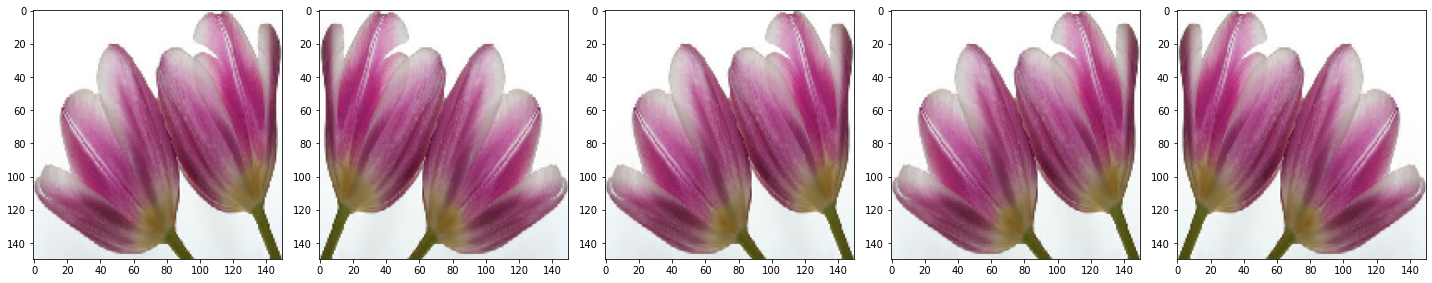

In [55]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [56]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range= 45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


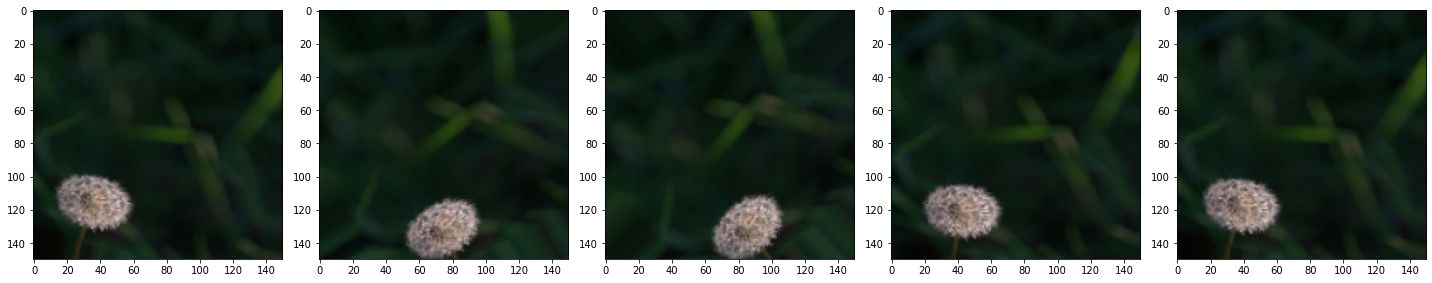

In [57]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [58]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range= 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle= True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


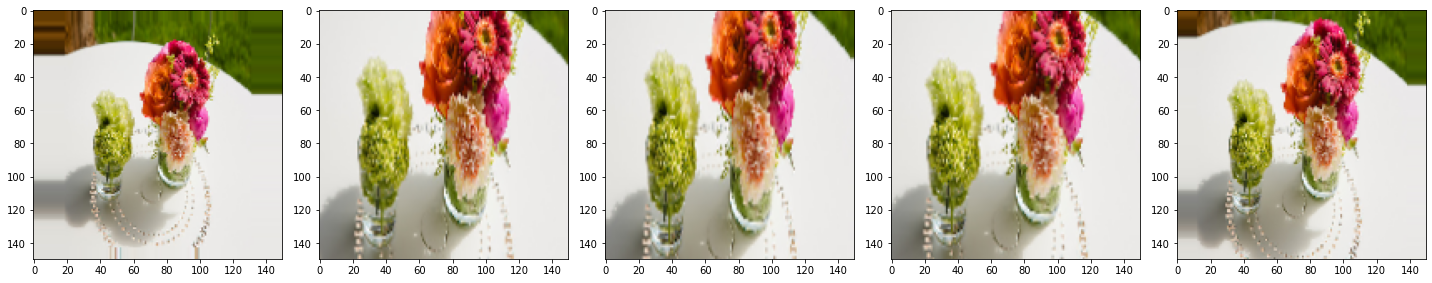

In [59]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [60]:
# put all together
image_gen_train = ImageDataGenerator(rescale = 1./255, 
                                     rotation_range = 45,
                                     horizontal_flip = True,
                                     zoom_range = 0.5,
                                     width_shift_range = 0.15,
                                     height_shift_range = 0.15)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory = train_dir,
                                                     shuffle = True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'sparse')

Found 2935 images belonging to 5 classes.


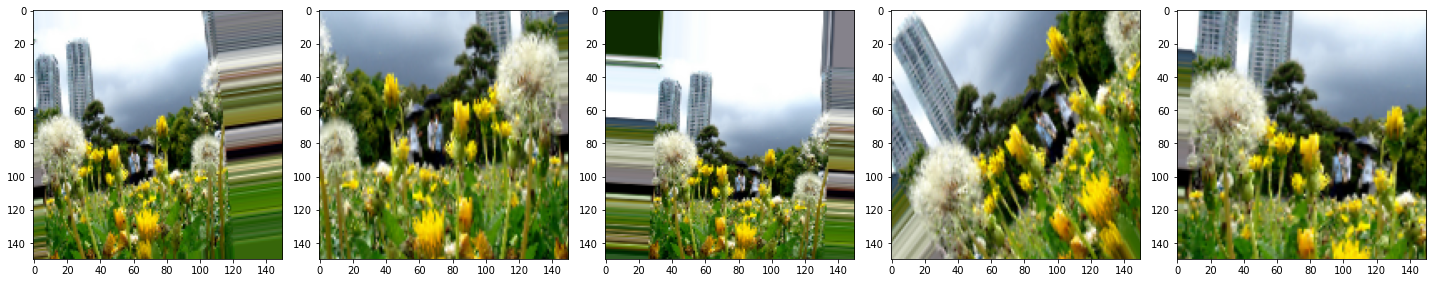

In [61]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [62]:
image_gen_val = ImageDataGenerator(rescale= 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                 directory = val_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'sparse')

Found 735 images belonging to 5 classes.


In [0]:
# # create a model
# #MY MODEL

# model = tf.keras.Sequential([
#                              tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
#                              tf.keras.layers.MaxPooling2D((2,2)),
#                              tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
#                              tf.keras.layers.MaxPooling2D((2,2)),
#                              tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
#                              tf.keras.layers.MaxPooling2D((2,2)),

#                              tf.keras.layers.Flatten(),
#                              tf.keras.layers.Dropout(0.2),
#                              tf.keras.layers.Dense(512, activation='relu'),
#                              tf.keras.layers.Dense(5, activation='softmax')
# ])

In [0]:
# dusra model
model = tf.keras.Sequential([
                    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)),
                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

                    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(5, activation= 'softmax'),
])


In [0]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [66]:
EPOCHS = 80

history = model.fit_generator(train_data_gen,
                              steps_per_epoch = int(np.ceil(train_data_gen.n /float(BATCH_SIZE))),
                              epochs = EPOCHS,
                              validation_data = val_data_gen,
                              validation_steps = int(np.ceil(val_data_gen.n /float(BATCH_SIZE))),
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
30/30 [==============================] - 26s 866ms/step - loss: 1.5748 - accuracy: 0.3036 - val_loss: 1.4703 - val_accuracy: 0.4204
Epoch 2/80
30/30 [==============================] - 26s 876ms/step - loss: 1.4349 - accuracy: 0.4511 - val_loss: 1.4048 - val_accuracy: 0.4993
Epoch 3/80
30/30 [==============================] - 27s 886ms/step - loss: 1.3653 - accuracy: 0.5394 - val_loss: 1.3760 - val_accuracy: 0.5224
Epoch 4/80
30/30 [==============================] - 27s 889ms/step - loss: 1.3487 - accuracy: 0.5492 - val_loss: 1.3294 - val_accuracy: 0.5714
Epoch 5/80
30/30 [==============================] - 27s 908ms/step - loss: 1.3161 - accuracy: 0.5881 - val_loss: 1.3432 - val_accuracy: 0.5551
Epoch 6/80
30/30 [==============================] - 27s 890ms/step - loss: 1.3029 - accuracy: 0.5922 - val_loss: 1.3252 - val_accuracy: 0.5701
Epoch 7/80
30/30 [==============================] - 27s 907ms/step

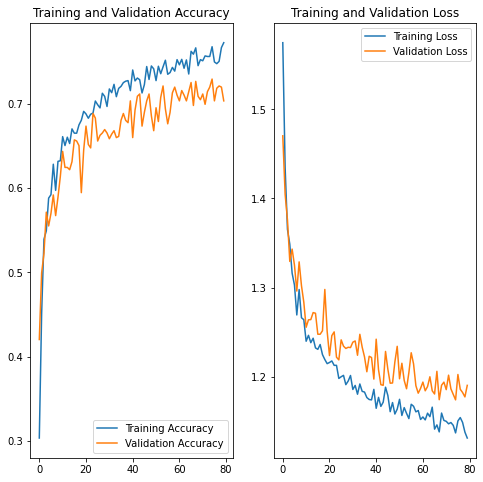

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()